In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\LuckySingh\learn ML\assignments\assignment 2\Dataset\Dataset\University_Clustering.xlsx")
df.head()


,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [3]:
df.isnull().sum()


UnivID      0
Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [4]:
df.describe()


,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop columns
df_clean = df.drop(columns=["UnivID", "Univ"])

# Fill missing values (numeric)
num_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())

# Encode State
le = LabelEncoder()
df_clean["State"] = le.fit_transform(df_clean["State"])

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)

scaled_df.head()


,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1.144789,0.405892,0.657519,-0.889867,0.073195,-0.331413,8.266705e-01
1,-1.475327,1.395107,1.235212,-0.734657,-1.683496,2.560381,-6.387909e-01
2,0.943242,-0.065163,-0.760454,1.024382,-0.930628,-0.167121,-1.653341e+00
3,0.741694,0.405892,-0.025208,-0.786394,-0.177760,0.291649,-1.601958e-15
4,0.741694,0.123259,0.342414,-0.320766,0.073195,-0.390846,3.757593e-01


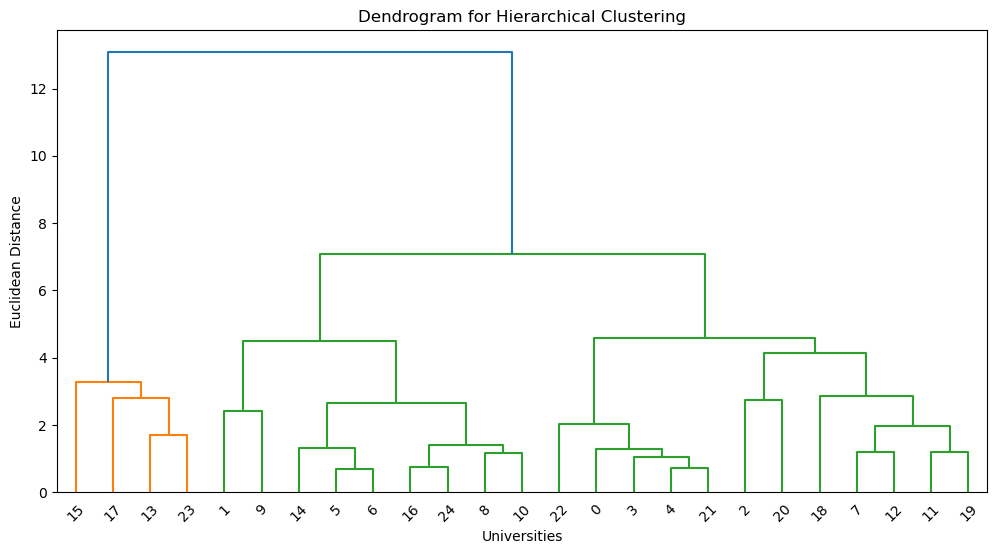

In [6]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(scaled_df, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Universities")
plt.ylabel("Euclidean Distance")
plt.show()


In [7]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(scaled_df)

df["Cluster"] = clusters
df[["Univ", "State", "Cluster"]].head(10)


,Univ,State,Cluster
0,Brown,RI,3
1,CalTech,CA,0
2,CMU,PA,2
3,Columbia,NY,3
4,Cornell,NY,3
5,Dartmouth,NH,0
6,Duke,NC,0
7,Georgetown,DC,2
8,Harvard,MA,0
9,JohnsHopkins,MD,0


In [8]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_df, df["Cluster"])
print("✅ Silhouette Score:", round(score, 3))


✅ Silhouette Score: 0.247


In [9]:
df.groupby("Cluster")[["SAT","Top10","Expenses","GradRate"]].mean()


,SAT,Top10,Expenses,GradRate
Cluster,,,,
0,1362.777778,90.555556,41176.888889,92.222222
1,1061.500000,38.750000,9953.000000,71.750000
2,1247.500000,76.714286,22473.714286,85.285714
3,1282.000000,81.000000,23396.000000,91.500000


In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

hc2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels2 = hc2.fit_predict(scaled_df)
print("Silhouette (2):", silhouette_score(scaled_df, labels2))



Silhouette (2): 0.49954822343700395


In [11]:
hc3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels3 = hc3.fit_predict(scaled_df)
print("Silhouette (3):", silhouette_score(scaled_df, labels3))


Silhouette (3): 0.2517841294092045


In [12]:
hc5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels5 = hc5.fit_predict(scaled_df)
print("Silhouette (5):", silhouette_score(scaled_df, labels5))


Silhouette (5): 0.2657071170200878


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

df["PC1"] = pca_data[:,0]
df["PC2"] = pca_data[:,1]


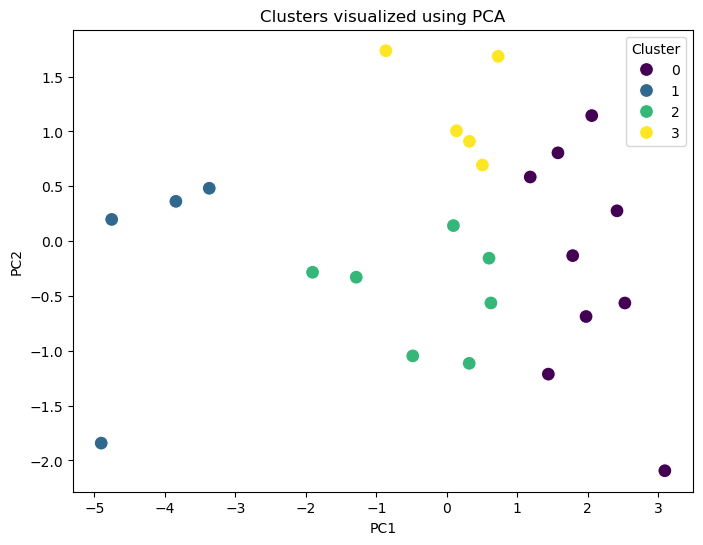

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=100)
plt.title("Clusters visualized using PCA")
plt.show()
